In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline
sns.set()

In [3]:
print(os.listdir('../FinalWork/berlin-airbnb-data'))

['reviews.csv', '.DS_Store', 'neighbourhoods.csv', 'listings.csv', 'calendar_summary.csv', 'reviews_summary.csv', '.ipynb_checkpoints', 'listings_summary.csv']


In [134]:
df_reviews = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews.csv')
df_neighbourhoods = pd.read_csv('../FinalWork/berlin-airbnb-data/neighbourhoods.csv')
df_listings = pd.read_csv('../FinalWork/berlin-airbnb-data/listings.csv')
df_calendar_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/calendar_summary.csv')
df_reviews_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews_summary.csv')
df_listings_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/listings_summary.csv')

In [98]:
df_listings_summary.head()

id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 sq meters. This wood...   
1                                                NaN   
2  This beautiful first floor apartment  is situa...   
3  First of all: I prefer short-notice bookings. ...   
4  Cozy and large room in the beautiful district ...   

                                               space  \
0  A+++ location! This „Einliegerwohnung“ is an e...   
1  In the summertime we are spending most of our ...   
2  1st floor (68m2) apartment on Kollwitzplatz/ P...   
3  Your room is really big and has 26 sqm, is ver...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description experiences_offered  \
0  Great location!  30 of 75 sq meters. This wood...                none   
1  In the summertime we are spending most of our ...                none   
2  This beautiful first floor apartment  is situa...                none   
3  First of all: I prefer short-notice bookings. ...                none   
4  Cozy and large room in the beautiful district ...                none   

                               neighborhood_overview  ... requires_license  \
0  It is located in the former East Berlin area o...  ...                t   
1                                                NaN  ...                t   
2  The neighbourhood is famous for its variety of...  ...                t   
3  My flat is in the middle of West-Berlin, direc...  ...                t   
4  Great neighborhood with plenty of Cafés, Baker...  ...                t   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN                NaN                f                        f   
1     NaN                NaN                f                        f   
2     NaN                NaN                t                        f   
3     NaN                NaN                f                        f   
4     NaN                NaN                f                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     flexible                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4                     moderate                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               4   
1                                f                               1   
2                                f                               1   
3                                f                               1   
4                                f                               1   

   reviews_per_month  
0               3.76  
1               1.42  
2               1.25  
3               0.39  
4               1.75  

[5 rows x 96 columns]

In [5]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
# наличие удобств в квартире
df_listings_summary.amenities.head()

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3    {Internet,Wifi,"Pets allowed","Pets live on th...
4    {Wifi,Heating,"Family/kid friendly",Essentials...
Name: amenities, dtype: object

In [7]:
# список наименований удобств для дальнейшего выбора важных. Удаление лишних символов
s2 = '":@.-()/{}'
for row in df_listings_summary.amenities:
    s1 = row
    for sim in s2:
        s1 = s1.replace(str(sim), '')
    R = s1.split(",")
    print (R)

['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Gym', 'Heating', 'Familykid friendly', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private living room', 'Bathtub', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Stove', 'Luggage dropoff allowed', 'Long term stays allowed']
['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'Private living room']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Pets allowed', 'Pets live on this property', 'Cats', 'Free street

['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you']
['TV', 'Wifi', 'Pets allowed', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Shampoo', 'Hangers', 'Hair dryer', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Hot water', 'Bed linens', 'Luggage dropoff allowed', 'Other']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Familykid frien

['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Elevator', 'Indoor fireplace', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Hot water', 'Long term stays allowed', 'Other']
['Wifi', 'Heating', 'Familykid friendly', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Self checkin', 'Lockbox', 'Private entrance', 'Window guards', 'Roomdarkening shades', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Single level home', 'Garden or backyard', 'Luggage dropoff allowed', 'Accessibleheight bed', 'Stepfree access', 'Handheld shower head']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Dryer', 'Essen

['Internet', 'Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Safety card', 'Essentials', 'translation missing enhosting_amenity_50']
['Wifi', 'Wheelchair accessible', 'Pets live on this property', 'Dogs', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Essentials']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Gym', 'Indoor fireplace', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Hair dryer']
['Internet', 'Wifi', 'Kitchen', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Shampoo']
['Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Carbon monoxide detector', 'First aid kit', 'Essentials', 'Shampoo']
['Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Buzzerwireless i

['TV', 'Internet', 'Wifi', 'Kitchen', 'Free parking on premises', 'Pets allowed', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Carbon monoxide detector', 'Essentials', 'Shampoo', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Children’s books and toys', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Patio or balcony']
['Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detecto

['Kitchen', 'Familykid friendly', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'Fire extinguisher']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Elevator', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Lock on bedroom door', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Bathtub', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Single level home', 'Patio or balcony', 'Luggage dropoff allowed', 'Long term stays allowed', 'Stepfree access', 'Flat path to front door', 'Other', 'Waterfront']
['Wifi', 'Kitchen', 'Paid parking off premises', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendl

['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'translation missing enhosting_amenity_50', 'Hot water', 'Host greets you']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Heating', 'Washer', 'Essentials', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'Hot water', 'Host greets you']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitche

['TV', 'Internet', 'Wifi', 'Kitchen', 'Breakfast', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['']
['Internet', 'Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Hangers']
['Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Kitchen', 'Free parking on premises', 'Heating', 'Washer', 'Essentials', '24hour checkin', 'Hangers', 'Hair dryer', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Pets live on this property', 'Cats', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Lock on bedroom door', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basi

['Wifi', 'Kitchen', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['Wifi', 'Kitchen', 'Washer', 'First aid kit', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Children’s books and toys', 'Game console', 'Microwave', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Stove', 'Single level home', 'Patio or balcony', 'Luggage dropoff allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Gym', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'First aid kit', 'Safety card', 'Essentials', 'Lock on bedroom door', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Private living room', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Luggage d

['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Laptop friendly workspace', 'Bathtub', 'Hot water', 'Bed linens', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Free parking on premises', 'Smoking allowed', 'Heating', 'Washer', 'First aid kit', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Hot water', 'Bed linens', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Heating', 'Familykid friendl

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['Wifi', 'Kitchen', 'Breakfast', 'Heating', 'Washer', 'First aid kit', 'Safety card', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private living room', 'Private entrance']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Essentials', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Private living room', 'Private entrance', 'Other']
['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private entrance', 'Hot water', 'Host greets you']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Long term stays allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Smoking allowed', 'Breakfast', 'Elevator', 'Heating', 'Suitable 

['TV', 'Wifi', 'Kitchen', 'Heating', 'Washer', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private entrance', 'Bathtub', 'Hot water', 'Extra pillows and blankets', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Pets allowed', 'Heating', 'Washer', 'First aid kit', 'Essentials', 'Lock on bedroom door', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['TV', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private living room', 'Hot water', 'Luggage dropoff allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Paid parking off premises', 'Heating', 'Washer', 'First aid kit', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 

['TV', 'Wifi', 'Kitchen', 'Pets allowed', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hangers', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Essentials', 'Lock on bedroom door']
['Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hair dryer', 'Iron']
['TV', 'Wifi', 'Kitchen', 'Free parking on premises', 'Pets allowed', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Private entrance', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Host greets you']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Essentials', 'Hangers', 'Laptop friendly workspace', 'Hot water', 'Other']
['Wifi', 'Kitchen', 'Smoking allowed', 'Doorman', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Dryer', 'Fire extinguisher', 'Essentials', 'Sha

['Wifi', 'Kitchen', 'Smoking allowed', 'Pets allowed', 'Heating', 'Washer', 'Essentials', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Wifi', 'Kitchen', 'Paid parking off premises', 'Pets allowed', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Other']
['Wifi', 'Kitchen', 'Washer', 'Essentials', 'Hair dryer', 'Laptop friendly workspace', 'Hot water', 'Other']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private entrance', 'Hot water', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you', 'Full kitchen']
['Wifi', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Heating', 'Washer', 'First aid kit', 'Ess

['Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Washer', 'Dryer', 'First aid kit', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Bathtub', 'Cleaning before checkout']
['Kitchen', 'Free parking on premises', 'Elevator', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Lock on bedroom door', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Hair dryer', 'Iron', 'Hot water', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Host greets you']
['Kitchen', 'Heating', 'Essentials', 'Hangers', 'Laptop friendly workspace', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Long term stays allowed']
['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Smoke

['Wifi', 'Kitchen', 'Pets allowed', 'Heating', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'Self checkin', 'Building staff', 'Private living room', 'Private entrance']
['TV', 'Wifi', 'Kitchen', 'Pets allowed', 'Elevator', 'Heating', 'Washer', 'Smoke detector', 'Essentials', 'Lock on bedroom door', 'Hangers', 'Private entrance']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['TV', 'Wifi', 'Kitchen', 'Free parking on premises', 'Heating', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Laptop friendly workspace', 'Bed linens', 'Other']
['Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Safety card', 'F

In [135]:
df_listings_summary["amenities"] = df_listings_summary["amenities"].apply(lambda x: x[1:-1].replace("\"", "").split(","))

In [136]:
df_listings_summary["amenities"].head()

0    [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...
1    [Wifi, Kitchen, Elevator, Heating, Washer, Ess...
2    [Internet, Wifi, Kitchen, Buzzer/wireless inte...
3    [Internet, Wifi, Pets allowed, Pets live on th...
4    [Wifi, Heating, Family/kid friendly, Essential...
Name: amenities, dtype: object

In [137]:
# в значениях стоимости присутствует знак $ нужно будет его удалить
df_listings_summary.price.head()

0    $60.00
1    $17.00
2    $90.00
3    $26.00
4    $42.00
Name: price, dtype: object

In [138]:
# обработка пропущенных значений стоимости
df_listings_summary["security_deposit"].fillna("$0.00", inplace=True)
df_listings_summary["cleaning_fee"].fillna("$0.00", inplace=True)
df_listings_summary["extra_people"].fillna("$0.00", inplace=True)

In [139]:
# удаляем символ $ из значений стоимости
def remove_s(str_price):
    if "," in str_price:
        str_price = str_price.replace(",", "")
    else:
        pass
    return str_price[1:]


for s_column in ["price", "security_deposit", "cleaning_fee", "extra_people"]:
    price_no_s = df_listings_summary[s_column].apply(remove_s)
    df_listings_summary[s_column] = price_no_s

In [140]:
df_listings_summary["price"] = df_listings_summary["price"].astype("float")

In [141]:
df_listings_summary["price"].head()

0    60.0
1    17.0
2    90.0
3    26.0
4    42.0
Name: price, dtype: float64

In [142]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [143]:
# Заполняем пропущенные значения
df_listings_summary["host_is_superhost"].fillna("f", inplace=True)
df_listings_summary["host_is_superhost"].isna().any()

False

In [144]:
# Заполняем пропущенные значения
df_listings_summary["host_identity_verified"].fillna("f", inplace=True)
df_listings_summary["host_identity_verified"].isna().any()

False

In [145]:
# Заполняем пропущенные значения
df_listings_summary["bedrooms"].fillna(1.0, inplace=True)
df_listings_summary["bedrooms"].isna().any()

False

In [295]:
# Выбираем нужные колонки
columns_to_keep = ["id", "neighbourhood_cleansed", "neighbourhood_group_cleansed",
                   "property_type", "room_type", "accommodates", "bedrooms", "bed_type",
                   "amenities", "price", "security_deposit", "cleaning_fee", "guests_included", 
                   "extra_people", "minimum_nights", "instant_bookable", "cancellation_policy",
                   "host_identity_verified", "is_business_travel_ready", "host_is_superhost", "latitude", "longitude"]

In [296]:
df_listings_summary_selected = df_listings_summary[columns_to_keep] 
df_listings_summary_selected.head()

id    neighbourhood_cleansed neighbourhood_group_cleansed property_type  \
0  2015           Brunnenstr. Süd                        Mitte    Guesthouse   
1  2695  Prenzlauer Berg Nordwest                       Pankow     Apartment   
2  3176   Prenzlauer Berg Südwest                       Pankow     Apartment   
3  3309           Schöneberg-Nord       Tempelhof - Schöneberg     Apartment   
4  7071            Helmholtzplatz                       Pankow     Apartment   

         room_type  accommodates  bedrooms       bed_type  \
0  Entire home/apt             3       1.0       Real Bed   
1     Private room             2       1.0       Real Bed   
2  Entire home/apt             4       1.0       Real Bed   
3     Private room             2       1.0  Pull-out Sofa   
4     Private room             2       1.0       Real Bed   

                                           amenities  price  ...  \
0  [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...   60.0  ...   
1  [Wifi, Kitchen, Elevator, Heating, Washer, Ess...   17.0  ...   
2  [Internet, Wifi, Kitchen, Buzzer/wireless inte...   90.0  ...   
3  [Internet, Wifi, Pets allowed, Pets live on th...   26.0  ...   
4  [Wifi, Heating, Family/kid friendly, Essential...   42.0  ...   

  guests_included extra_people  minimum_nights instant_bookable  \
0               1        28.00               4                f   
1               1         0.00               2                f   
2               2        20.00              62                t   
3               1        18.00               5                f   
4               1        24.00               2                f   

           cancellation_policy host_identity_verified  \
0  strict_14_with_grace_period                      t   
1                     flexible                      t   
2  strict_14_with_grace_period                      t   
3  strict_14_with_grace_period                      t   
4                     moderate                      t   

  is_business_travel_ready host_is_superhost   latitude  longitude  
0                        f                 t  52.534537  13.402557  
1                        f                 f  52.548513  13.404553  
2                        f                 f  52.534996  13.417579  
3                        f                 f  52.498855  13.349065  
4                        f                 t  52.543157  13.415091  

[5 rows x 22 columns]

In [297]:
# Проверяем наличие пропущенных значений
df_listings_summary_selected.isna().sum()

id                              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
bed_type                        0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
minimum_nights                  0
instant_bookable                0
cancellation_policy             0
host_identity_verified          0
is_business_travel_ready        0
host_is_superhost               0
latitude                        0
longitude                       0
dtype: int64

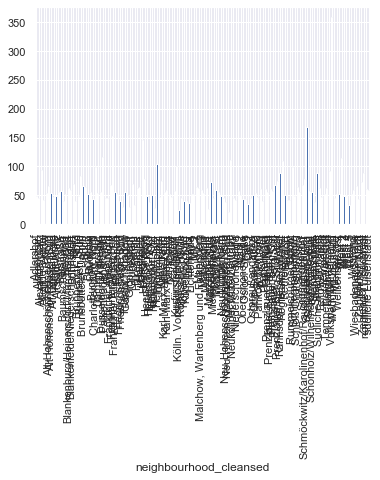

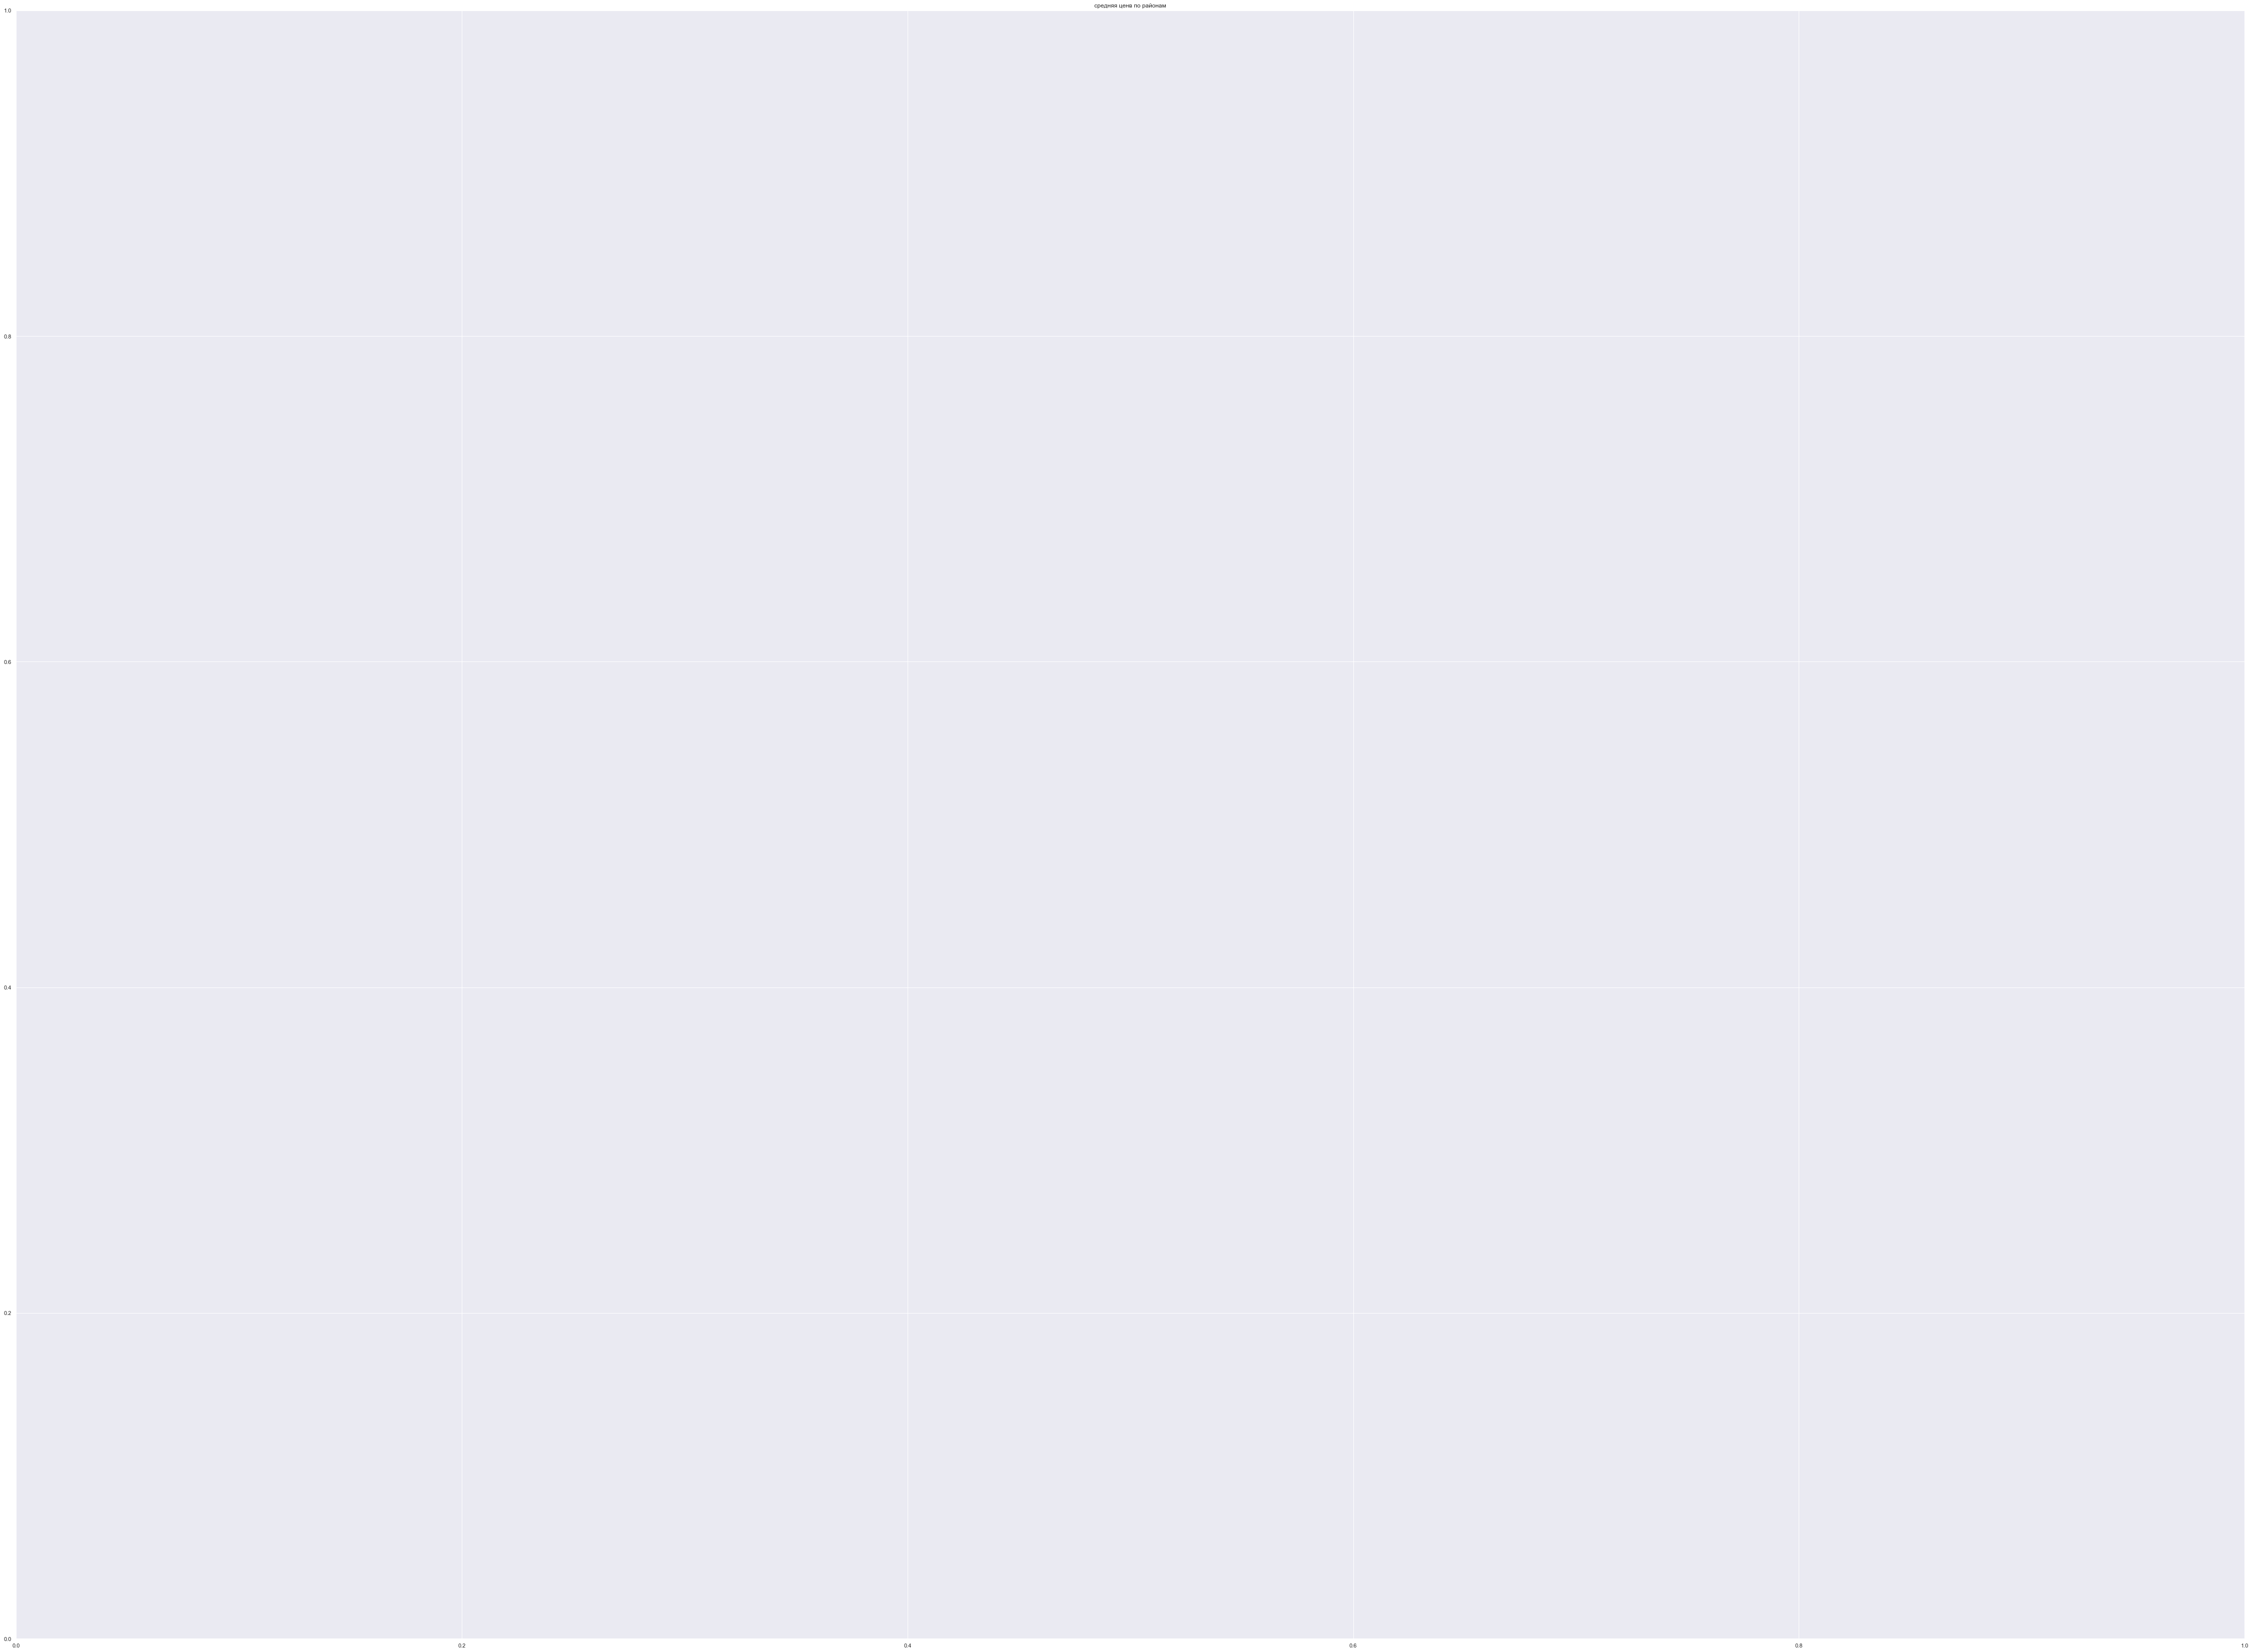

In [298]:
# влияние переменных на цену
avg_price_host = df_listings_summary_selected.groupby("neighbourhood_cleansed").mean()["price"]
avg_price_host.plot(kind="bar")
plt.figure(figsize=(80, 60)) # не получается увеличить
plt.title("средняя ценв по районам")
plt.show()

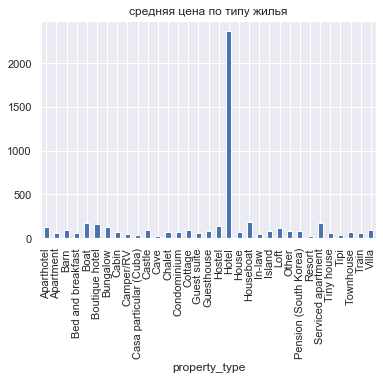

In [299]:
avg_price_host = df_listings_summary_selected.groupby("property_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу жилья")
plt.show()

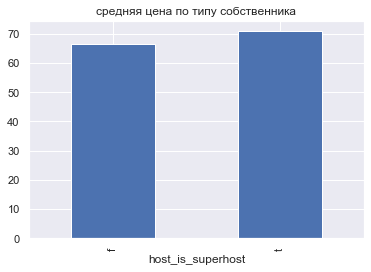

In [300]:
avg_price_host = df_listings_summary_selected.groupby("host_is_superhost").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу собственника")
plt.show()

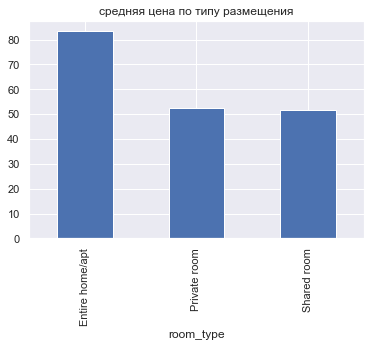

In [301]:
# здесь видно, что влияет на цену только один тип размещения. Целесообразно сделать одну колонку
avg_price_host = df_listings_summary_selected.groupby("room_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу размещения")
plt.show()

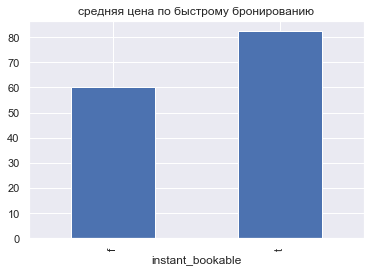

In [302]:
avg_price_host = df_listings_summary_selected.groupby("instant_bookable").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по быстрому бронированию")
plt.show()

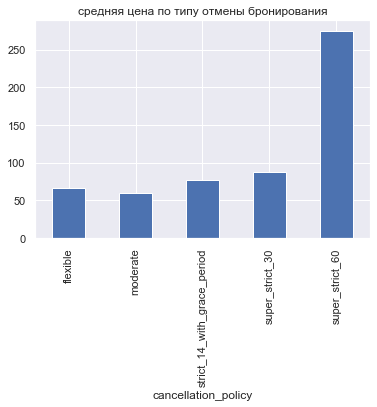

In [303]:
avg_price_host = df_listings_summary_selected.groupby("cancellation_policy").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

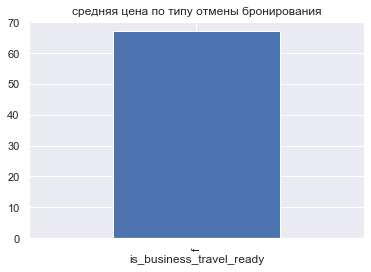

In [304]:
# эта колонка не влияет на цену
avg_price_host = df_listings_summary_selected.groupby("is_business_travel_ready").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

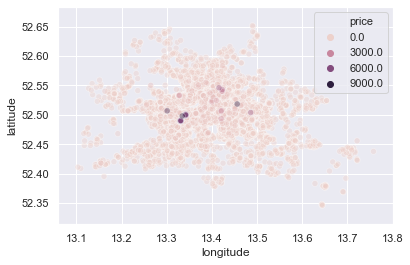

In [305]:
geo = df_listings_summary_selected[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)  
geo.describe()
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

In [269]:
# дальнейшие действия: нужно найти выбросы данных цен, создать новые колонки по наличию/отсутствию услуг или удобств,
# рассчитать удаленность от центра

In [270]:
# находим верхнюю границу цен для 99.5% предложений
print(format(np.percentile(df_listings_summary_selected["price"], 99.5)))

400.0


In [271]:
# оставляем только эти 99.5%, остатки считаем выбросами
df_listings_summary_cleaned = df_listings_summary_selected[(df_listings_summary_selected.price 
                                 <= np.percentile(df_listings_summary_selected["price"],
                                99.5)) & (df_listings_summary_selected.price > 0)]

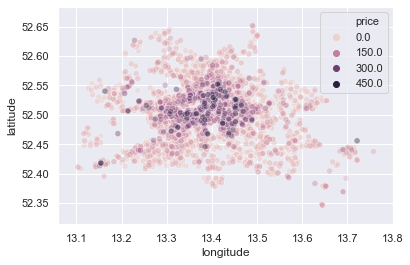

In [272]:
geo = df_listings_summary_cleaned[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)  
geo.describe()
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

In [66]:
conda update -n base -c defaults conda

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    anaconda-project-0.8.4     |             py_0         215 KB
    asn1crypto-1.3.0           |           py37_0         167 KB
    astroid-2.3.3              |           py37_0         285 KB
    astropy-4.0                |   py37h1de35cc_0         6.0 MB
    attrs-19.3.0               |             py_0          39 KB
    babel-2.8.0                |

path-13.1.0          | 34 KB     | ##################################### | 100% 
dask-2.10.1          | 13 KB     | ##################################### | 100% 
pytest-doctestplus-0 | 21 KB     | ##################################### | 100% 
fontconfig-2.13.0    | 202 KB    | ##################################### | 100% 
certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
llvm-openmp-4.0.1    | 409 KB    | ##################################### | 100% 
bokeh-1.4.0          | 13.6 MB   | ##################################### | 100% 
jsonschema-3.2.0     | 93 KB     | ##################################### | 100% 
mkl_fft-1.0.15       | 157 KB    | ##################################### | 100% 
heapdict-1.0.1       | 9 KB      | ##################################### | 100% 
xlsxwriter-1.2.7     | 111 KB    | ##################################### | 100% 
openpyxl-3.0.3       | 162 KB    | ##################################### | 100% 
openssl-1.1.1d       | 3.4 M

geos-3.7.1           | 1.1 MB    | ##################################### | 100% 
imageio-2.6.1        | 3.4 MB    | ##################################### | 100% 
jupyterlab-1.2.6     | 2.8 MB    | ##################################### | 100% 
bottleneck-1.3.1     | 118 KB    | ##################################### | 100% 
fsspec-0.6.2         | 53 KB     | ##################################### | 100% 
pytest-astropy-0.7.0 | 9 KB      | ##################################### | 100% 
numpydoc-0.9.2       | 31 KB     | ##################################### | 100% 
_anaconda_depends-20 | 6 KB      | ##################################### | 100% 
matplotlib-3.1.3     | 21 KB     | ##################################### | 100% 
h5py-2.10.0          | 810 KB    | ##################################### | 100% 
dbus-1.13.12         | 516 KB    | ##################################### | 100% 
chardet-3.0.4        | 174 KB    | ##################################### | 100% 
setuptools-45.1.0    | 511 K

In [67]:
conda install -c conda-forge gdal

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/osx-64::boost-cpp==1.70.0=hd59e818_1
done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - gdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.69.0           |    h6f8c590_1000        18.6 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    openssl-1.1.1d             |       h0b31af3_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        23.8 MB

The follow

In [68]:
from osgeo import gdal, ogr

In [70]:
osm = ogr.Open('germany-latest.osm.pbf')

In [72]:
conda install -c conda-forge geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cfitsio-3.470              |       h389770f_2         1.4 MB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.5.0                |             py_0           8 KB  conda-forge
    fiona-1.8.11               |   py37heeaa653_0         627 KB
    gdal-3.0.2                 |   py37hbe65578_0         1.6 MB
    geopandas-0.6.2            |             py_0         906 KB  conda-forge
    geos-3.8.0                 |       h0a44026_0         813 KB
    geotiff-1.5.1              |       h0b0f252_0         119 KB
    libgdal-3.0.2              |       h42cfeda_0        17.3 MB
    libspatialindex-1.9.3      |       h0a44026_0         421 KB
    libs

In [87]:
import geopandas as gp

ImportError: dlopen(/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/fiona/ogrext.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libgeos_c.1.dylib
  Referenced from: /Users/olgakhamtsova/anaconda3/lib/libgdal.26.dylib
  Reason: Incompatible library version: libgdal.26.dylib requires version 15.0.0 or later, but libgeos_c.1.dylib provides version 13.0.0

In [79]:
germany = geopandas.read_file('germany-latest.osm.pbf')

NameError: name 'geopandas' is not defined

In [81]:
conda update -n base -c defaults libgeos


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/olgakhamtsova/anaconda3
  package name: libgeos



Note: you may need to restart the kernel to use updated packages.


In [82]:
conda install libdgal

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - libdgal

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [306]:
# Проведем отбор фичей связанных с условиями проживания 
condition = ['property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights']

In [307]:
df_listings_summary_cleaned[condition].head()

property_type        room_type       bed_type  \
0    Guesthouse  Entire home/apt       Real Bed   
1     Apartment     Private room       Real Bed   
2     Apartment  Entire home/apt       Real Bed   
3     Apartment     Private room  Pull-out Sofa   
4     Apartment     Private room       Real Bed   

                                           amenities  cleaning_fee  \
0  [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...          30.0   
1  [Wifi, Kitchen, Elevator, Heating, Washer, Ess...           0.0   
2  [Internet, Wifi, Kitchen, Buzzer/wireless inte...          50.0   
3  [Internet, Wifi, Pets allowed, Pets live on th...          30.0   
4  [Wifi, Heating, Family/kid friendly, Essential...           0.0   

   minimum_nights  
0               4  
1               2  
2              62  
3               5  
4               2

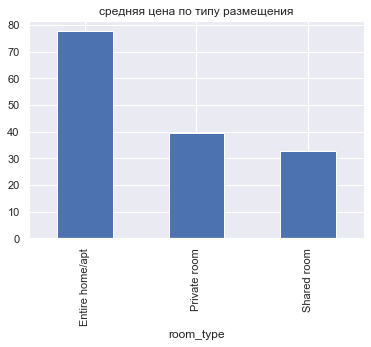

In [308]:
# Средняя стоимость по колонке room_type (тип размещения). Стоимость значительно выше только по одному типу размещения.
avg_price = df_listings_summary_cleaned.groupby("room_type").mean()["price"]
avg_price.plot(kind="bar")
plt.title("средняя цена по типу размещения")
plt.show()

In [309]:
# Сделаем одну колонку
selected = []
df_listings_summary_cleaned["is_entire_apt"] = df_listings_summary_cleaned["room_type"]=="Entire home/apt"
selected.append("is_entire_apt")

In [310]:
selected

['is_entire_apt']

In [311]:
# Посмотрим на колонку bed_type. Почти все значения в этой колонке относятся к типу Real Bed,
# соответственно это не оказывает влияния на цену
df_listings_summary_cleaned["bed_type"].value_counts()

Real Bed         21659
Pull-out Sofa      449
Futon              240
Couch               70
Airbed              23
Name: bed_type, dtype: int64

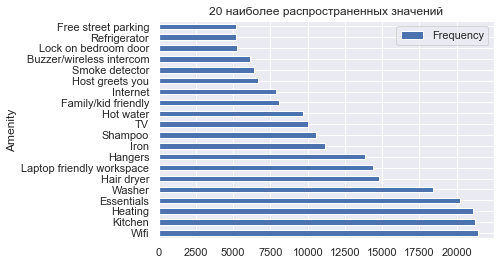

In [312]:
amenity_types = []
for i in df_listings_summary_cleaned["amenities"]:
    amenity_types += i
freq = dict((x, amenity_types.count(x)) for x in set(amenity_types))
freq = pd.DataFrame.from_dict(freq, orient="index")
freq.reset_index(inplace=True)
freq.columns = ["Amenity", "Frequency"]
freq = freq.sort_values(by="Frequency", ascending=False)
freq.head(20).plot.barh(x="Amenity", y="Frequency")
plt.title("20 наиболее распространенных значений")
plt.show()

In [313]:
freq.head(20)

Amenity  Frequency
90                        Wifi      21413
95                     Kitchen      21255
32                     Heating      21111
9                   Essentials      20236
15                      Washer      18428
36                  Hair dryer      14811
78   Laptop friendly workspace      14387
67                     Hangers      13832
59                        Iron      11134
58                     Shampoo      10586
132                         TV      10051
37                   Hot water       9684
76         Family/kid friendly       8099
43                    Internet       7881
50             Host greets you       6639
60              Smoke detector       6404
5     Buzzer/wireless intercom       6099
80        Lock on bedroom door       5265
14                Refrigerator       5183
40         Free street parking       5174

In [314]:
df_listings_summary_cleaned["amenities"].head()

0    [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...
1    [Wifi, Kitchen, Elevator, Heating, Washer, Ess...
2    [Internet, Wifi, Kitchen, Buzzer/wireless inte...
3    [Internet, Wifi, Pets allowed, Pets live on th...
4    [Wifi, Heating, Family/kid friendly, Essential...
Name: amenities, dtype: object

In [315]:
# Почти во всех позициях присутствуют три самых распространенных эемента: Wifi, Kitchen, Heating. 
# Влияния на стоимость не оказывают

In [316]:
# Выберем те значения, которые встречаются в более чем половине случаев
df_listings_summary_cleaned["hair_dryer"] = df_listings_summary_cleaned["amenities"].apply(lambda x: '"Hair dryer"' in x)
df_listings_summary_cleaned["lap_friendly"] = df_listings_summary_cleaned["amenities"].apply(lambda x: '"Laptop friendly workspace"' in x)
df_listings_summary_cleaned["Washer"] = df_listings_summary_cleaned["amenities"].apply(lambda x: "Washer" in x)
for i in ["hair_dryer", "lap_friendly", "Washer"]:
    selected.append(i)

In [317]:
selected

['is_entire_apt', 'hair_dryer', 'lap_friendly', 'Washer']

In [318]:
# Статистика по колонке minimum_nights
df_listings_summary_cleaned["minimum_nights"].describe()

count    22441.000000
mean         7.167105
std         40.750941
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [319]:
# Проверим как влияет на стоимость количество минимальных ночевок
df_listings_summary_cleaned["minimum_nights_more_1"] = df_listings_summary_cleaned["minimum_nights"].apply(lambda x: 'True' if x > 1 else 'False')
selected.append("minimum_nights_more_1")

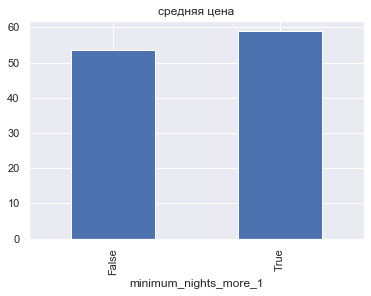

In [320]:
# Средняя цена предложений, которые запрашивают более одной ночевки выше. Включим такую олонку в нашу модель
avg_price_nights = df_listings_summary_cleaned.groupby("minimum_nights_more_1").mean()["price"]
avg_price_nights.plot(kind="bar")
plt.title("средняя цена")
plt.show()

In [321]:
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1']

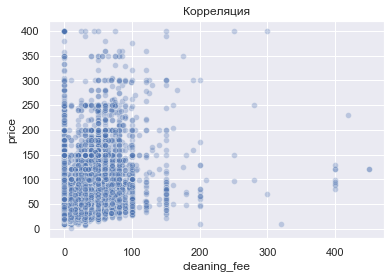

корреляция Пирсона между коллонкой cleaning_fee и стоимостью =  0.4041  p-value =  0.0000.


In [322]:
from scipy import stats
df_listings_summary_cleaned["cleaning_fee"] = df_listings_summary_cleaned["cleaning_fee"].astype("float")
df_listings_summary_cleaned["cleaning_fee"].describe()
sns.scatterplot(x="cleaning_fee", y="price", data=df_listings_summary_cleaned, alpha=0.3)
plt.title("Корреляция")
plt.show()
print("корреляция Пирсона между коллонкой cleaning_fee и стоимостью = {0[0]: .4f}  p-value = {0[1]: .4f}.".format(stats.pearsonr(df_listings_summary_cleaned["cleaning_fee"], 
                                                                                            df_listings_summary_cleaned["price"])))

In [323]:
# Включим колонку cleaning_fee в модель, т. к. она коррелирует со стоимостью
selected.append("cleaning_fee")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee']

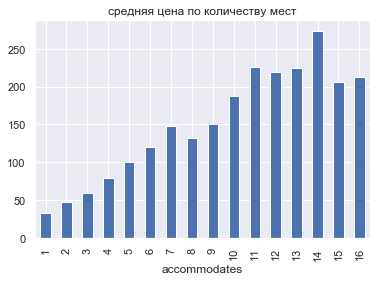

In [329]:
# Посмотрим как влияет на стоимость размер жилья. В качестве показателя размера выберем колонку accommodates
df_listings_summary_cleaned.groupby("accommodates").mean()["price"].plot(kind="bar")
plt.title("средняя цена по количеству мест")
plt.show()

In [330]:
# Размер определенно оказывает влияние на стоимость. Включим этот показатель в модель
selected.append("accommodates")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates']

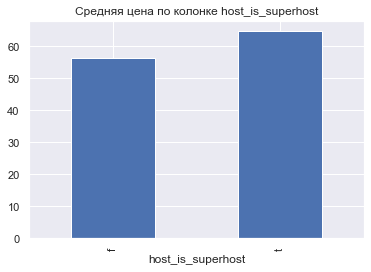

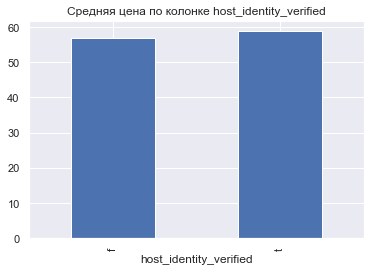

In [341]:
# Проверим влияние характеристик собственника жилья на стоимость
host = ['host_is_superhost', 'host_identity_verified']
df_listings_summary_cleaned.describe(include="all")[host]
for col in host:
    avg_price_host = df_listings_summary_cleaned.groupby(col).mean()["price"]
    avg_price_host.plot(kind="bar")
    plt.title("Средняя цена по колонке "+col)
    plt.show()


In [342]:
# Включим данные характеристик собственника в нашу модель, т.к. заметна зависимость цены от этого типа данных
selected.append("host_is_superhost")
selected.append("host_identity_verified")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified']

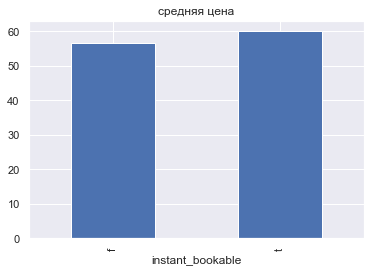

In [343]:
# Средняя цена предложений по признаку мгновенного бронирования.
avg_price_bookable = df_listings_summary_cleaned.groupby("instant_bookable").mean()["price"]
avg_price_bookable.plot(kind="bar")
plt.title("средняя цена")
plt.show()

In [344]:
# Данные о мгновенном бронировании так же включим в модель
selected.append("instant_bookable")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable']

In [345]:
# Статистика по правилам отмены бронирования:
print(df_listings_summary_cleaned["cancellation_policy"].value_counts())

flexible                       9051
moderate                       7075
strict_14_with_grace_period    6253
super_strict_30                  50
super_strict_60                  12
Name: cancellation_policy, dtype: int64


In [347]:
# Очевидно, что предложений с суперстрогими правилами отмены значительно меньше. 
# Из этого следует, что стоимость будет зависеть от гибкости или не гибкости правила отмены
df_listings_summary_cleaned["cancellation_not_flexible"] = df_listings_summary_cleaned["cancellation_policy"]!="flexible"
df_listings_summary_cleaned["cancellation_not_flexible"].value_counts()
selected.append("cancellation_not_flexible")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible']

In [348]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 11 columns):
is_entire_apt                22441 non-null bool
hair_dryer                   22441 non-null bool
lap_friendly                 22441 non-null bool
Washer                       22441 non-null bool
minimum_nights_more_1        22441 non-null object
cleaning_fee                 22441 non-null float64
accommodates                 22441 non-null int64
host_is_superhost            22441 non-null object
host_identity_verified       22441 non-null object
instant_bookable             22441 non-null object
cancellation_not_flexible    22441 non-null bool
dtypes: bool(5), float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [351]:
# Преобразование величин:
df_listings_summary_cleaned["host_is_superhost"] = df_listings_summary_cleaned["host_is_superhost"]=="t"
df_listings_summary_cleaned["host_identity_verified"] = df_listings_summary_cleaned["host_identity_verified"]=="t"
df_listings_summary_cleaned["instant_bookable"] = df_listings_summary_cleaned["instant_bookable"]=="t"
df_listings_summary_cleaned["minimum_nights_more_1"] = df_listings_summary_cleaned["minimum_nights_more_1"]=="t"

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [352]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 11 columns):
is_entire_apt                22441 non-null bool
hair_dryer                   22441 non-null bool
lap_friendly                 22441 non-null bool
Washer                       22441 non-null bool
minimum_nights_more_1        22441 non-null bool
cleaning_fee                 22441 non-null float64
accommodates                 22441 non-null int64
host_is_superhost            22441 non-null bool
host_identity_verified       22441 non-null bool
instant_bookable             22441 non-null bool
cancellation_not_flexible    22441 non-null bool
dtypes: bool(9), float64(1), int64(1)
memory usage: 723.2 KB


In [353]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [354]:
from geopy.geocoders import Nominatim

In [356]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.0.1-py_0
  branca             conda-forge/noarch::branca-0.3.1-py_0
  folium      

In [357]:
import folium

In [386]:
lat = 52.509
long = 13.381
base = folium.Map(location=[lat,long], zoom_start=12) 
base

In [387]:
POI = folium.map.FeatureGroup()

In [388]:
lat_long_list = [[52.525293,13.369359],[52.558794,13.288437],[52.516497,13.377683],
                 [52.517693,13.402141],[52.518770,13.376166]]

In [389]:
for i in range(0,len(lat_long_list)):
    POI.add_child(
        folium.CircleMarker(
        lat_long_list[i],
        radius = 16,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
        )
    )
base.add_child(POI)

In [363]:
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}

In [377]:
df_listings_summary_cleaned.sort_values(by='price',ascending=False,axis=0,inplace=True)

In [378]:
df_top100 = df_listings_summary_cleaned.head(100)

In [390]:
for inc_lat,inc_long in zip(df_top100.longitude,df_top100.latitude):
    POI.add_child(
    folium.CircleMarker(
    [inc_long,inc_lat],
    radius = 6,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6
    )
)
base.add_child(POI)

In [392]:
df_top100['neighbourhood_group_cleansed'].value_counts().reset_index()

index  neighbourhood_group_cleansed
0                     Mitte                            31
1  Friedrichshain-Kreuzberg                            20
2      Charlottenburg-Wilm.                            13
3    Tempelhof - Schöneberg                            10
4                    Pankow                            10
5                  Neukölln                             8
6        Treptow - Köpenick                             3
7     Steglitz - Zehlendorf                             3
8                   Spandau                             1
9               Lichtenberg                             1

In [422]:
df_listings_summary_cleaned["good_location"] = df_listings_summary_cleaned["neighbourhood_group_cleansed"].apply(lambda x: 'True' if x in ["Mitte", "Friedrichshain-Kreuzberg", "Charlottenburg-Wilm.", "Tempelhof - Schöneberg", "Pankow"] else 'False')

In [423]:
df_listings_summary_cleaned.head()

id    neighbourhood_cleansed neighbourhood_group_cleansed  \
3192    4819610  Neuköllner Mitte/Zentrum                     Neukölln   
21944  29155985       Zehlendorf  Südwest        Steglitz - Zehlendorf   
21878  29090853       Zehlendorf  Südwest        Steglitz - Zehlendorf   
22253  29546155        Brunsbütteler Damm                      Spandau   
12366  18289300                Kantstraße         Charlottenburg-Wilm.   

      property_type        room_type  accommodates  bedrooms  bathrooms  beds  \
3192      Apartment  Entire home/apt             7       5.0        2.0   5.0   
21944         House  Entire home/apt             6       3.0        2.0   5.0   
21878         House  Entire home/apt             6       3.0        2.0   5.0   
22253     Apartment  Entire home/apt             8       4.0        1.0   5.0   
12366     Apartment  Entire home/apt             9       3.0        2.0   4.0   

                                                   space  ...  \
3192                                                 NaN  ...   
21944  Im Wohnzimmer stehen Sofas aus Einzelmodulen, ...  ...   
21878  Im Wohnzimmer stehen Sofas aus Einzelmodulen, ...  ...   
22253                                                NaN  ...   
12366  Two luxury bathrooms with whirpool and rainsho...  ...   

       host_is_superhost   latitude  longitude  is_entire_apt hair_dryer  \
3192               False  52.469290  13.437717           True      False   
21944              False  52.417840  13.154178           True      False   
21878              False  52.417874  13.154299           True      False   
22253              False  52.540154  13.163202           True      False   
12366              False  52.505421  13.308687           True      False   

       lap_friendly  Washer minimum_nights_more_1  cancellation_not_flexible  \
3192          False    True                 False                      False   
21944         False    True                 False                      False   
21878         False    True                 False                      False   
22253         False   False                 False                      False   
12366         False    True                 False                       True   

       good_location  
3192           False  
21944          False  
21878          False  
22253          False  
12366           True  

[5 rows x 33 columns]

In [424]:
selected.append("good_location")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible',
 'good_location']